In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
mpl.rcParams['figure.dpi'] = 70

In [3]:
def preprocess(dir_path, cut_len):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            if cut_len != None:
                x = x[:cut_len]
                y = y[:cut_len]
            M.append(y)
    M = np.vstack(M)
    return M

def line_95_percent(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess(result_path, cut_len)
#     print(cummulative_regret.shape)

    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

def plot_lines(dir_path):
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        print(file)
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            plt.plot(x, y)



# Car

car-greedy-v1
car-opt-vi-v2


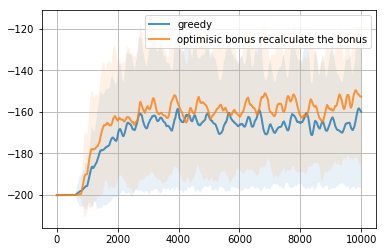

In [231]:
plt.grid()
alpha=0.1
lw=2
# line_95_percent('car-opt-vi-v1', label='opt vi b 2.0', linewidth=lw, alpha=alpha, cut_len=10000)
line_95_percent('car-greedy-v1', label='greedy', linewidth=lw, alpha=alpha, cut_len=10000)
line_95_percent('car-opt-vi-v2', label='optimisic bonus recalculate the bonus', linewidth=lw, alpha=alpha)
plt.legend()

# Hard acrobot version

bot-greedy-v4
bot-opt-vi-v7


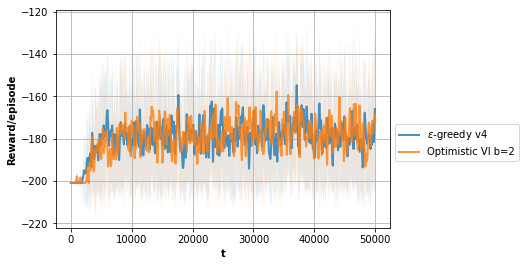

In [166]:
plt.grid()
alpha=0.1
lw=2
line_95_percent('bot-greedy-v4', label='$\epsilon$-greedy v4', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-vi-v7', label='Optimistic VI b=2', linewidth=lw, alpha=alpha)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward/episode', fontweight='bold')
# plt.legend(loc=4)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig('pole0-v1', dpi=300)

# Normal acrobot

In [87]:
ls

bot-egreedy/      bot-politex-0.125/            car-pol/
bot-egreedy-v16/  bot-politex-0.25/             car-politex/
bot-egreedy-v2/   bot-politex-0.5/              car-politex-0.001/
bot-greedy-v10/   bot-politex-opt-test/         car-politex-0.1/
bot-greedy-v11/   bot-politex-test/             car-politex-20/
bot-greedy-v12/   bot-politex-test-1/           car-politex-200/
bot-greedy-v13/   bot-politex-test-2/           car-politex-30/
bot-greedy-v14/   bot-politex-test-3/           car-politex-40/
bot-greedy-v15/   bot-politex-test-4/           car-politex-40-2/
bot-greedy-v3/    bot-politex-test-5/           car-politex-60/
bot-greedy-v4/    bot-v1.png                    car-politex-70/
bot-greedy-v5/    bot-vi/                       car-politex-80/
bot-greedy-v6/    bot-vi-v1/                    car-politex-90/
bot-greedy-v7/    bot-vi-v12/                   car-v1-1.png
bot-opt-politex/  bot-vi-v2/                    car-vi/
bot-opt-vi/       bot-vi-v21/                   car-vi

In [594]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [85]:
ls bot-greedy-v13

result0.pkl   result18.pkl  result26.pkl  result34.pkl  result4.pkl
result10.pkl  result19.pkl  result27.pkl  result35.pkl  result5.pkl
result11.pkl  result1.pkl   result28.pkl  result36.pkl  result6.pkl
result12.pkl  result20.pkl  result29.pkl  result37.pkl  result7.pkl
result13.pkl  result21.pkl  result2.pkl   result38.pkl  result8.pkl
result14.pkl  result22.pkl  result30.pkl  result39.pkl  result9.pkl
result15.pkl  result23.pkl  result31.pkl  result3.pkl   setting.txt
result16.pkl  result24.pkl  result32.pkl  result40.pkl
result17.pkl  result25.pkl  result33.pkl  result41.pkl


bot-opt-vi-v29
bot-opt-vi-v20
bot-vi-v7
bot-greedy-v15


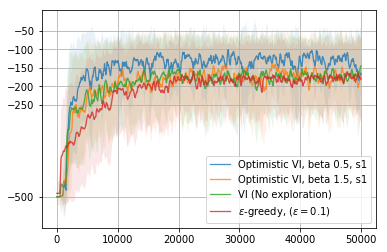

In [90]:
plt.grid()
alpha=0.1
lw=1.3
cutlen = 50000
# line_95_percent('bot-opt-vi-v6', label='Optimistic VI', linewidth=lw, alpha=alpha, cut_len=20000)
# line_95_percent('bot-opt-vi-v11', label=r'VI $M_{t-1}$ for $V_{t-1}$, $\beta=2.0$', linewidth=lw, alpha=alpha, cut_len=20000) #


# line_95_percent('bot-opt-vi-v16', label=r'Optimistic VI, beta 1.5, s2', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5 sample len 1
# line_95_percent('bot-vi-v23', label=r'optimistic VI, beta 10', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5
# line_95_percent('bot-vi-v21', label=r'optimistic VI, beta=0.5', linewidth=lw, alpha=alpha) # $M_{t-1}$ for $V_{t-1}$, $\beta=1.$
# line_95_percent('bot-vi-v22', label=r'optimistic VI, beta=2.5', linewidth=lw, alpha=alpha) # $M_{t-1}$ for $V_{t-1}$, $\beta=1.$
# line_95_percent('bot-greedy-v3/', label='e greedy', linewidth=lw, alpha=alpha, cut_len=20000) # greedy decay from 0.8 -> 0.05, ftr size 
# line_95_percent('bot-greedy-v11/', label='e greedy sample len 5', linewidth=lw, alpha=alpha) # greedy decay from 0.8 -> 0.05, ftr size 
# line_95_percent('bot-greedy-v4', label='e greedy', linewidth=lw, alpha=alpha, cut_len=20000) # greedy fix e=0.05
# line_95_percent('bot-greedy-v6', label='e greedy, ftr_size=81', linewidth=lw, alpha=alpha) # greedy fix e=0.05
# line_95_percent('bot-greedy-v7', label='e greedy', linewidth=lw, alpha=alpha, cut_len=20000)
# line_95_percent('bot-vi', label='VI (No exploration)', linewidth=lw, alpha=alpha, cut_len=20000) #
# line_95_percent('bot-greedy-v12', label=r'$\epsilon$-greedy', linewidth=lw, alpha=alpha) # greedy decay from 0.8 -> 0.05, ftr size, buffersize=2000, saple len 2

# line_95_percent('bot-opt-vi-v19', label=r'optimistic VI, beta=2', linewidth=lw, alpha=alpha) # $M_{t-1}$ for $V_{t-1}$, $\beta=1.$

# line_95_percent('bot-opt-vi-v15', label=r'Optimistic VI, beta 1.5', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5 sample len 2
# line_95_percent('bot-greedy-v13', label='e greedy sample len 2', linewidth=lw, alpha=alpha) # greedy decay from 0.8 -> 0.05, ftr size, buffersize=2000
# line_95_percent('bot-vi-v6', label='VI (No exploration) s 2', linewidth=lw, alpha=alpha) # , sample len=2, buffer=2000

line_95_percent('bot-opt-vi-v29', label=r'Optimistic VI, beta 0.5, s1', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5 sample len 1
line_95_percent('bot-opt-vi-v20', label=r'Optimistic VI, beta 1.5, s1', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5 sample len 1
line_95_percent('bot-vi-v7', label='VI (No exploration)', linewidth=lw, alpha=alpha) # , sample len=1, buffer=2000
line_95_percent('bot-greedy-v15', label=r'$\epsilon$-greedy, ($\epsilon=0.1$)', linewidth=lw, alpha=alpha) # greedy fix e=0.1, sample-len 1

# line_95_percent('bot-vi-v1', label='VI (No exploration)', linewidth=lw, alpha=alpha) #

# line_95_percent('bot-vi-v3', label='VI (No exploration), sample len=1', linewidth=lw, alpha=alpha) #
# line_95_percent('bot-vi-v5', label='VI (No exploration), sample len=6', linewidth=lw, alpha=alpha, cut_len=cutlen) #

# plt.xlim(-100,30000)
plt.yticks([-50, -100, -200, -150, -250, -500])
plt.legend()

bot-opt-vi-v29
bot-greedy-v15


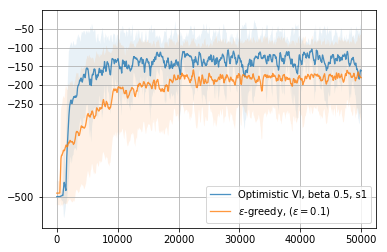

In [95]:
plt.grid()
alpha=0.1
lw=1.3
cutlen = 50000

line_95_percent('bot-opt-vi-v29', label=r'Optimistic VI, beta 0.5, s1', linewidth=lw, alpha=alpha, cut_len=cutlen) # beta 1.5 sample len 1
line_95_percent('bot-greedy-v15', label=r'$\epsilon$-greedy, ($\epsilon=0.1$)', linewidth=lw, alpha=alpha) # greedy fix e=0.1, sample-len 1

# line_95_percent('bot-vi-v1', label='VI (No exploration)', linewidth=lw, alpha=alpha) #

# line_95_percent('bot-vi-v3', label='VI (No exploration), sample len=1', linewidth=lw, alpha=alpha) #
# line_95_percent('bot-vi-v5', label='VI (No exploration), sample len=6', linewidth=lw, alpha=alpha, cut_len=cutlen) #

# plt.xlim(-100,30000)
plt.yticks([-50, -100, -200, -150, -250, -500])
plt.legend()

bot-egreedy
bot-vi
bot-opt-vi
bot-politex-test-1
bot-politex-test-4
bot-politex-test-5
bot-opt-politex


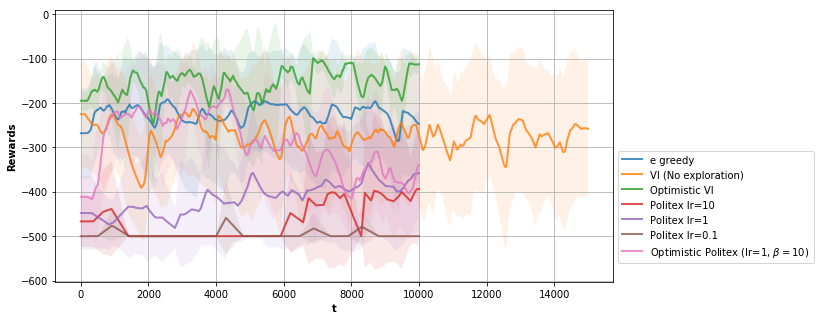

In [595]:
plt.grid()
alpha=0.1
lw=2
line_95_percent('bot-egreedy', label='e greedy', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi', label='VI (No exploration)', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-vi', label='Optimistic VI', linewidth=lw, alpha=alpha)
# line_95_percent('bot-opt-vi-2', label='Optimistic VI 1', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-1-2', label='Politex  ', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-0.125', label='Politex 0.125', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-0.25', label='Politex 0.25', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-1', label='Politex 1', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-test', label='Politex lr=1', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-test-2', label='Politex lr=2', linewidth=lw, alpha=alpha)
# line_95_percent('bot-politex-test-3', label='Politex lr=3', linewidth=lw, alpha=alpha)
line_95_percent('bot-politex-test-1', label='Politex lr=10', linewidth=lw, alpha=alpha)
line_95_percent('bot-politex-test-4', label='Politex lr=1', linewidth=lw, alpha=alpha)
line_95_percent('bot-politex-test-5', label='Politex lr=0.1', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-politex', label=r'Optimistic Politex (lr=1, $\beta=10$)', linewidth=lw, alpha=alpha)

# line_95_percent('pole0-opt-vi', label='Optimistic VI', linewidth=lw, alpha=alpha)
# plt.yticks([0,100,150, 200])
plt.xlabel('t', fontweight='bold')
plt.ylabel('Rewards', fontweight='bold')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig('bot-v1', dpi=300)

In [593]:
cp bot-v1.png ../notebook/

In [609]:
mv ../notebook/tmp.csv .

# Cartpole Plot v1

In [35]:
ls|grep pole1

pole1-egreedy/
pole1-opt-politex/
pole1-opt-vi/
pole1-politex/
pole1-vi/


bot-vi-v5


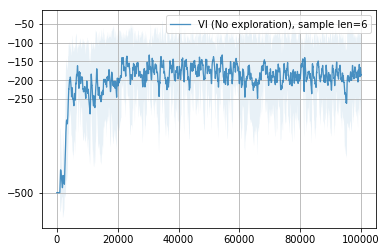

In [39]:
plt.grid()
alpha=0.1
lw=1.3
cutlen = 50000
line_95_percent('bot-vi-v5', label='VI (No exploration), sample len=6', linewidth=lw, alpha=alpha) #
plt.yticks([-50, -100, -200, -150, -250, -500])
plt.legend()

# Cartpole Plot v0

In [611]:
ls

bot-egreedy/                  car-opt-vi-2/       ftr/
bot-opt-politex/              car-opt-vi-3/       pole0-egreedy/
bot-opt-vi/                   car-opt-vi-4/       pole0-opt-politex/
bot-politex-0.125/            car-pol/            pole0-opt-politex-test/
bot-politex-0.25/             car-politex/        pole0-opt-politex-test-2/
bot-politex-0.5/              car-politex-0.001/  pole0-opt-vi/
bot-politex-opt-test/         car-politex-0.1/    pole0.png
bot-politex-test/             car-politex-20/     pole0-politex/
bot-politex-test-1/           car-politex-200/    pole0-v1.png
bot-politex-test-2/           car-politex-30/     pole0-vi/
bot-politex-test-3/           car-politex-40/     pole1-egreedy/
bot-politex-test-4/           car-politex-40-2/   pole1-opt-politex/
bot-politex-test-5/           car-politex-60/     pole1-opt-vi/
bot-v1.png                    car-politex-70/     pole1-politex/
bot-vi/                       car-politex-80/     pole1-vi/
car-egreedy/              

In [602]:
import pandas as pd

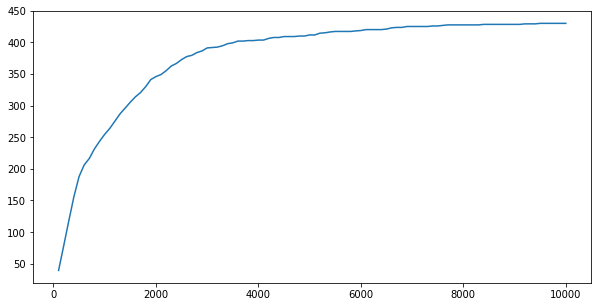

In [617]:
df = pd.read_csv('tmp.csv')
plt.plot(df['episode'], df['cumRegret'])

In [ ]:
cumRegret

pole0-vi
pole0-egreedy
pole0-opt-vi
pole0-politex
pole0-opt-politex
pole0-opt-politex-test-2


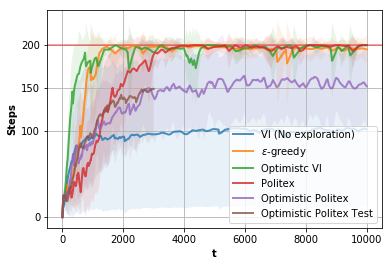

In [538]:
plt.grid()
alpha=0.1
lw=2
plt.axhline(200, color='r', alpha=0.5)
line_95_percent('pole0-vi', label='VI (No exploration)', linewidth=lw, alpha=alpha)
line_95_percent('pole0-egreedy', r'$\epsilon$-greedy', alpha=alpha, linewidth=lw)
line_95_percent('pole0-opt-vi', label='Optimistc VI', linewidth=lw, alpha=alpha)
line_95_percent('pole0-politex', label='Politex', linewidth=lw, alpha=alpha)
line_95_percent('pole0-opt-politex', label='Optimistic Politex', linewidth=lw, alpha=alpha)
line_95_percent('pole0-opt-politex-test-2', label='Optimistic Politex Test', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-politex-0.1', label='Politex 0.1', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-politex-0.01', label='Politex 0.01', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-politex-0.001', label='Politex 0.001', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-politex-0.0001', label='Politex 0.0001', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-greedy-avg', r'$\epsilon$-greedy', alpha=alpha, linewidth=lw)
# line_95_percent('pole0-egreedy-99', r'$\epsilon$-greedy .99', alpha=alpha, linewidth=lw)
# line_95_percent('pole0-egreedy-1', r'$\epsilon$-greedy1', alpha=alpha, linewidth=lw)

# line_95_percent('pole0-opt-vi', label='Optimistic VI', linewidth=lw, alpha=alpha)
plt.yticks([0,100,150, 200])
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.legend(loc=4)
plt.savefig('pole0-v1', dpi=300)

# Cartpole dqn

In [ ]:
M = preprocess('../tmp/cartpole-dqn-no-explore')
for i,e in enumerate(M):
#     if i!=3:
    plt.plot(e, label=i)
plt.legend()

In [ ]:
!ls ../tmp/cartpole-dqn-no-explore

For the DNNs experiments, the last layer of the neural nets is used as a feature vector $\phi(s,a)$. In the CartPole environment, we compare optimistic VI with $\epsilon$-greedy and DNNs without exploration. However the optimistic VI becomes unstable as more data are observed.

In [ ]:
alpha, linewidth=0.1, 1.5
plt.grid()
M = preprocess('../tmp/cartpole-dqn-greedy')
line_95_percent(M, r'$\epsilon$-greedy', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-dqn-no-explore')
line_95_percent(M, r'No exploration', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-optimistic')
line_95_percent(M, r'Optimistic VI, $\beta=1$', alpha=alpha, linewidth=linewidth)
# M = preprocess('../tmp/cartpole-dqn-optimistic-0.1')
# line_95_percent(M, r'Optimistic VI, $\beta=0.1$', alpha=alpha, linewidth=linewidth)
M = preprocess('../tmp/cartpole-dqn-optimistic-2')
line_95_percent(M, r'Optimistic VI, $\beta=2$', alpha=alpha, linewidth=linewidth)
# plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps')
plt.axhline(200, color='r')
plt.yticks([0,50, 100, 150, 200])
plt.xticks(range(0, 21000, 5000), range(0,21,5))
plt.xlabel(r'$t\times 10^3$')
plt.title('Cartpole-v0, DQN')
plt.legend(loc=4, prop={'size': 9})
plt.savefig('cartpole-v0-dnn', dpi=300)

# Acrobot

In [ ]:
!ls ../tmp|grep Acr|grep 30000

In [ ]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
plt.grid()
# beta = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# beta = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
# paths = ['../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-{}-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30'.format(b) for b in beta]
# for p, beta in zip(paths, beta):
#     print(p)
#     M = preprocess(p)
#     line_95_percent(M, beta, alpha=0.05)
alpha=0.1
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, 'No exploration', alpha=alpha)
M = preprocess('../tmp/algo-ep-gr-env-Acrobot-v1-fourier_order-2-beta-1-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-False')
line_95_percent(M, r'$\epsilon$-greedy $(\epsilon=0.1)$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=1.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-5.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=5.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=10.0$', alpha=alpha)
M = preprocess('../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'VI, $\beta=20.0$', alpha=alpha)

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,100,250,500])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend(loc=1)
plt.savefig('acrobot-v1_2', dpi=300)

# Mountain Car

In [766]:
ls car-opt-vi-4/

result0.pkl   result1.pkl   result2.pkl   result3.pkl   result4.pkl
result10.pkl  result20.pkl  result30.pkl  result40.pkl  result5.pkl
result11.pkl  result21.pkl  result31.pkl  result41.pkl  result6.pkl
result12.pkl  result22.pkl  result32.pkl  result42.pkl  result7.pkl
result13.pkl  result23.pkl  result33.pkl  result43.pkl  result8.pkl
result14.pkl  result24.pkl  result34.pkl  result44.pkl  result9.pkl
result15.pkl  result25.pkl  result35.pkl  result45.pkl  setting.txt
result16.pkl  result26.pkl  result36.pkl  result46.pkl
result17.pkl  result27.pkl  result37.pkl  result47.pkl
result18.pkl  result28.pkl  result38.pkl  result48.pkl
result19.pkl  result29.pkl  result39.pkl  result49.pkl


car-egreedy
car-egreedy/result49.pkl
car-egreedy/result18.pkl
car-egreedy/result8.pkl
car-egreedy/result22.pkl
car-egreedy/result17.pkl
car-egreedy/result42.pkl
car-egreedy/result10.pkl
car-egreedy/result27.pkl
car-egreedy/result7.pkl
car-egreedy/result31.pkl
car-egreedy/result12.pkl
car-egreedy/result11.pkl
car-egreedy/result46.pkl
car-egreedy/result37.pkl
car-egreedy/result39.pkl
car-egreedy/result43.pkl
car-egreedy/result41.pkl
car-egreedy/result44.pkl
car-egreedy/result26.pkl
car-egreedy/result13.pkl
car-egreedy/result45.pkl
car-egreedy/result1.pkl
car-egreedy/result47.pkl
car-egreedy/result29.pkl
car-egreedy/result38.pkl
car-egreedy/result5.pkl
car-egreedy/result33.pkl
car-egreedy/result30.pkl
car-egreedy/result4.pkl
car-egreedy/result24.pkl
car-egreedy/result20.pkl
car-egreedy/result6.pkl
car-egreedy/result2.pkl
car-egreedy/result15.pkl
car-egreedy/result0.pkl
car-egreedy/result25.pkl
car-egreedy/result35.pkl
car-egreedy/result23.pkl
car-egreedy/result34.pkl
car-egreedy/result40.

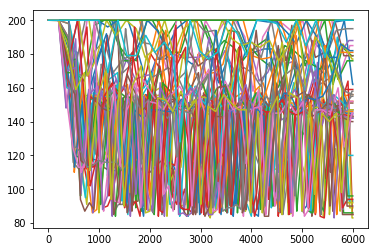

In [778]:
plot_lines('car-egreedy')

car-politex-40
car-politex-40/result1.pkl
car-politex-40/result5.pkl
car-politex-40/result4.pkl
car-politex-40/result2.pkl
car-politex-40/result0.pkl
car-politex-40/result3.pkl


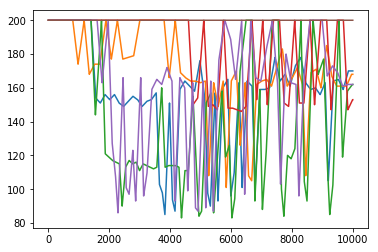

In [850]:
plot_lines('car-politex-40-')

In [888]:
ls car-politex-40-2

result0.pkl  result1.pkl  result2.pkl  result3.pkl  result4.pkl  setting.txt


car-vi
car-egreedy
car-opt-vi-4
car-politex-40-2


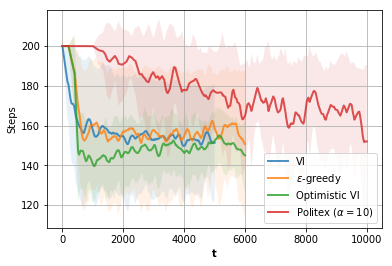

In [926]:
lw=2
alpha=0.1

line_95_percent('car-vi', label='VI', linewidth=lw, alpha=alpha)
line_95_percent('car-egreedy', label=r'$\epsilon$-greedy', linewidth=lw, alpha=alpha)
line_95_percent('car-opt-vi-4', label='Optimistic VI', linewidth=lw, alpha=alpha)
# line_95_percent('car-opt-vi-2', label='Optimistic VI 3', linewidth=lw, alpha=alpha)
# line_95_percent('car-opt-vi-3', label='Optimistic VI 4', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex', label=r'Politex $\alpha=10$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-20', label=r'Politex $\alpha=20$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-30', label=r'Politex $\alpha=30$', linewidth=lw, alpha=alpha)
line_95_percent('car-politex-40-2', label=r'Politex ($\alpha=10$)', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-60', label=r'Politex $\alpha=60$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-70', label=r'Politex $\alpha=70$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-80', label=r'Politex $\alpha=80$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-90', label=r'Politex $\alpha=90$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-100', label=r'Politex $\alpha=100$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-200', label=r'Politex $\alpha=200$', linewidth=lw, alpha=alpha)
# line_95_percent('car-politex-0.001', label='Politex', linewidth=lw, alpha=alpha)
plt.grid()
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps')
# plt.axhline(200, color='r')
plt.legend(loc=4)
plt.savefig('car-v1-1', dpi=300)

# Lunar Lander

In [803]:
!ls ../tmp|grep Luna

In [ ]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-3.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-False')
line_95_percent(M, 'Lunar')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-True')
line_95_percent(M, '10')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '20')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-30.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '30')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-50.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, '30')


plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(200, color='r')
# plt.yticks([-1.2,-0.5,0,0.25, 0.4])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('LunarLander-v1')
plt.legend()
plt.savefig('lunar-v2', dpi=300)

# Swing up

In [ ]:
!ls ../tmp|grep Swing

In [ ]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]
# fig = plt.gcf()
# fig.set_size_inches(10, 7)
alpha=0.1
plt.grid()
M = preprocess('../tmp/algo-val-env-CartPoleSwingUp-v0-fourier_order-2-beta-20.0-lambda-1.0-step-15000-discount-0.99-sample_len-5-n_eval-1-bonus-True')
line_95_percent(M, r'No exploration', alpha=alpha)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Position')
# plt.axhline(0.5, color='r')
# plt.yticks([-0.7,-0.5, -.2, 0,0.25, 0.5])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.xlabel(r'$t\times 10^3$')
plt.title('MountainCar-v0')
plt.legend(loc=4, prop={'size': 9})
plt.savefig('mountain-car-v0', dpi=300)